In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


## Titanic Survival Prediction using Logistic Regression

### Problem Statement
The goal of this project is to predict whether a passenger survived the Titanic disaster using machine learning. This is a binary classification problem where:

- 0 → Did not survive
- 1 → Survived

We will perform:
1. Data exploration
2. Data cleaning and preprocessing
3. Model training using Logistic Regression
4. Model evaluation using classification metrics

In [8]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = df.set_index("PassengerId")

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
df.shape

(891, 11)

In [13]:
age_p = 177/891
cabin_p = 687/891
print(f"missing age value are {age_p*100}")
print(f"missing cabin value are {cabin_p*100}")
# cant drop so many value since data set is not large

missing age value are 19.865319865319865
missing cabin value are 77.10437710437711


In [14]:
df['Deck'] = df['Cabin'].apply(lambda c: str(c)[0] if pd.notnull(c) else 'M' )

In [15]:
df['Age'] = df["Age"].fillna(df.groupby('Pclass')['Age'].transform('median'))

In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Deck          0
dtype: int64

In [18]:
df.drop('Cabin', axis = 1, inplace = True)

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

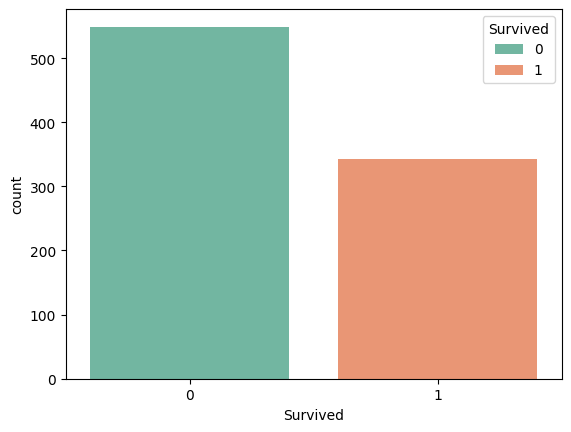

In [20]:
sns.countplot(x="Survived", data=df, hue='Survived', palette="Set2")
plt.show()


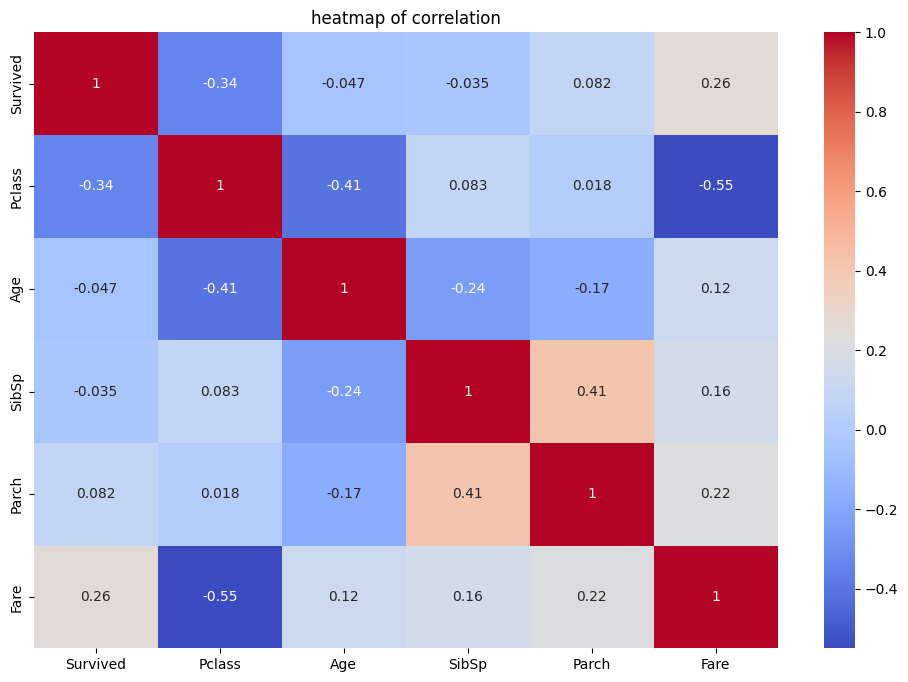

In [26]:
plt.figure(figsize=(12,8))
nums = df.select_dtypes(include=['number'])
sns.heatmap(nums.corr(), annot=True, cmap = 'coolwarm')
plt.title('heatmap of correlation')
plt.show()

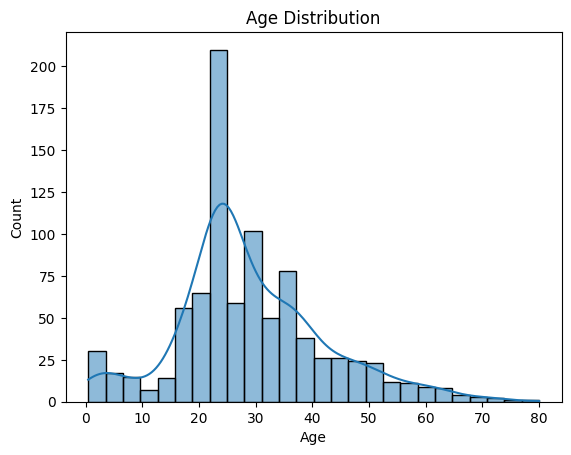

In [27]:
sns.histplot(data = df, x = "Age", kde=True)
plt.title("Age Distribution")
plt.show()

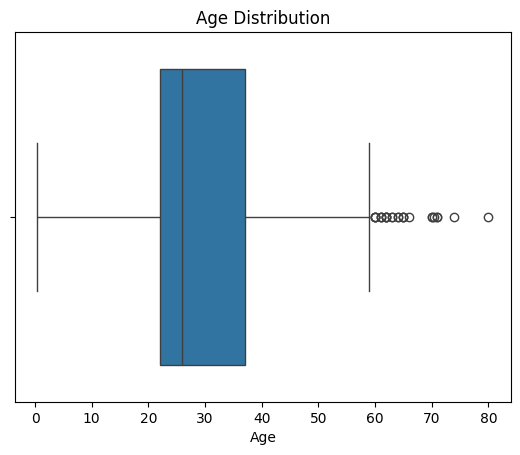

In [28]:
sns.boxplot(data = df, x = "Age")
plt.title("Age Distribution")
plt.show()

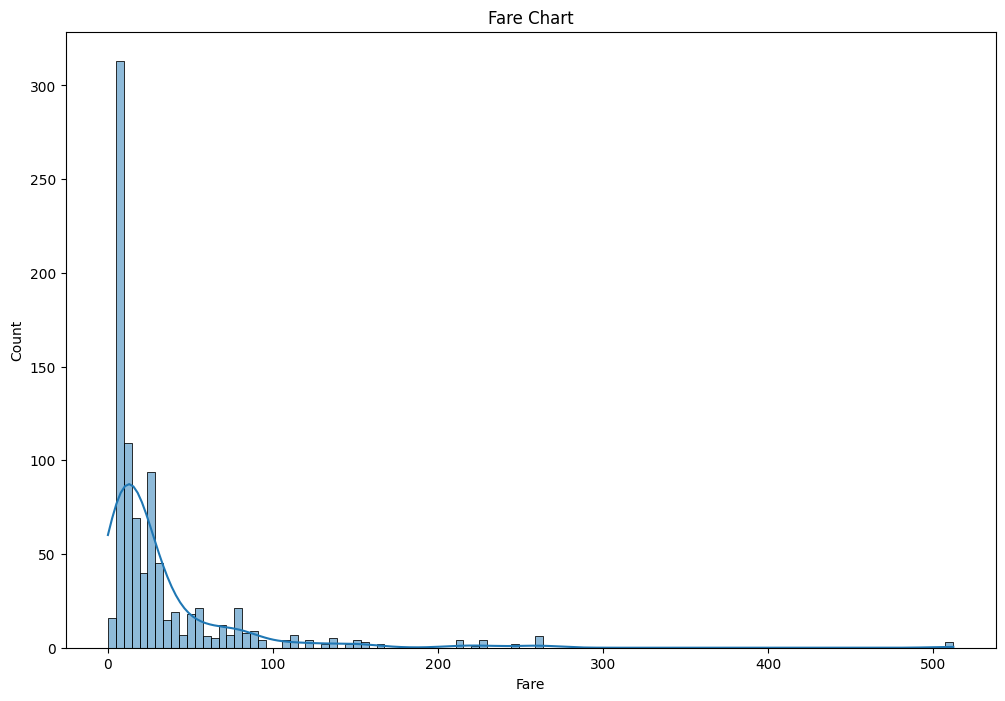

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x = "Fare", kde=True)
plt.title("Fare Chart")
plt.show()

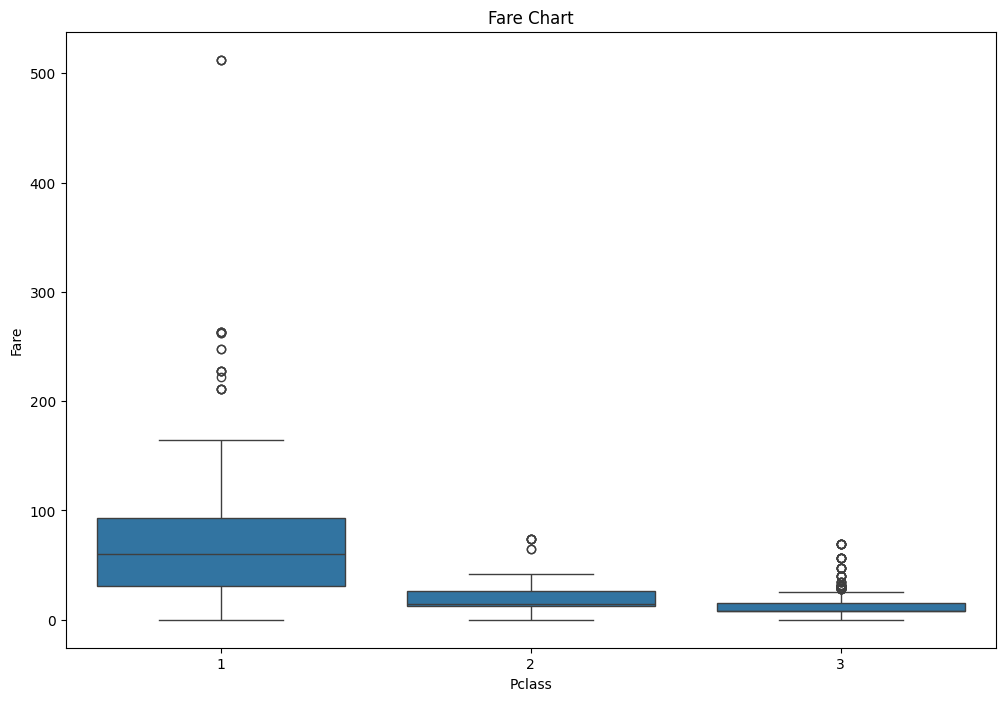

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, y = "Fare", x = "Pclass" )
plt.title("Fare Chart by P class")
plt.show()

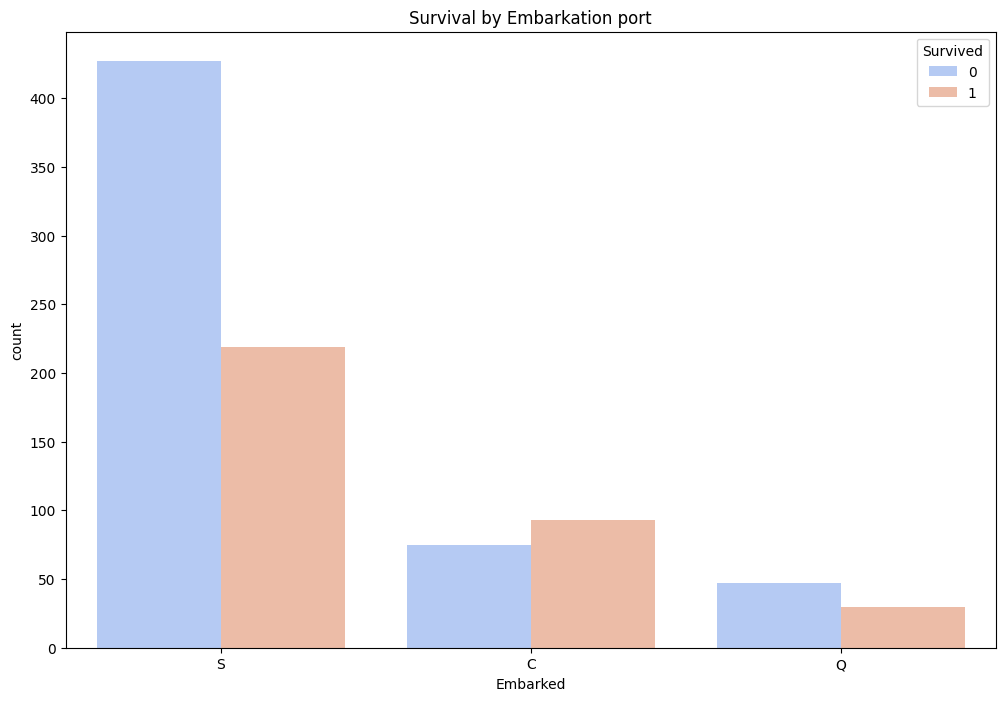

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(data = df, hue = "Survived", x = "Embarked", palette='coolwarm' )
plt.title("Survival by Embarkation port")
plt.show()

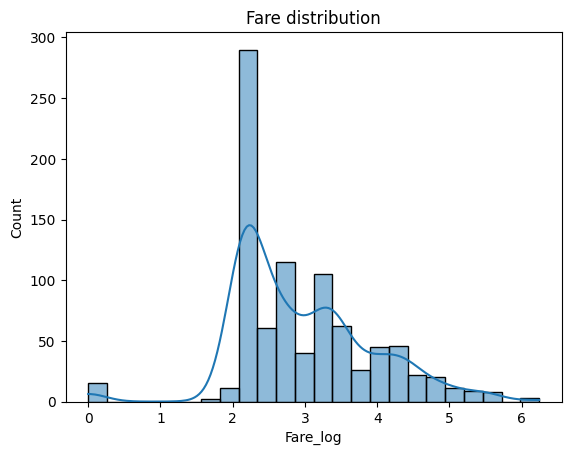

In [37]:
df['Fare_log'] = df["Fare"].apply(lambda x: np.log(x+1))
sns.histplot(data=df, x='Fare_log', kde=True)
plt.title('Fare distribution')
plt.show()

In [38]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [39]:
df = pd.get_dummies(df, columns=['Embarked','Deck'], drop_first = True)
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fare_log,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2.110213,False,True,False,False,False,False,False,False,True,False
2,1,1,1,38.0,1,0,71.2833,4.280593,False,False,False,True,False,False,False,False,False,False
3,1,3,1,26.0,0,0,7.9250,2.188856,False,True,False,False,False,False,False,False,True,False
4,1,1,1,35.0,1,0,53.1000,3.990834,False,True,False,True,False,False,False,False,False,False
5,0,3,0,35.0,0,0,8.0500,2.202765,False,True,False,False,False,False,False,False,True,False


In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop('Survived', axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (712, 17)
Testing data size: (179, 17)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [43]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(f'accuracy is {accuracy}')

accuracy is 0.8268156424581006


In [47]:
class_rep = classification_report(y_test,pred)
print(f'classification report : \n{class_rep}')

classification report : 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [49]:
cm = confusion_matrix(y_test, pred)

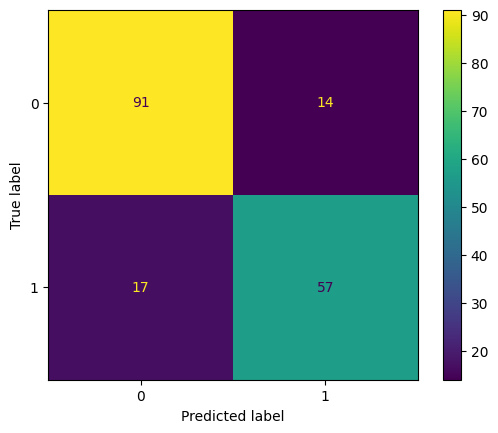

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()